# Prodigy Infotech

## Machine Learning Internship

Omar Amir Ali 

### Task_ML_01: House Price Prediction

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset and selecting features

In [2]:
# Importing dataset
dataset=pd.read_csv("house-prices-advanced-regression-techniques.csv")

In [3]:
# Display information about the DataFrame 'dataset'
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Selecting specific features from the dataset
data=dataset[['GrLivArea',"KitchenAbvGr","TotRmsAbvGrd",'LotArea','FullBath','HalfBath','BedroomAbvGr','MSSubClass','Fireplaces','TotalBsmtSF','SalePrice']]

In [7]:
# Calculate the total number of bathrooms by adding half baths and full baths
data.loc[:,'totalbathrooms'] = data['HalfBath'] + data['FullBath']

In [8]:
# Remove 'FullBath' and 'HalfBath' columns from the dataset
data=data.drop(['FullBath','HalfBath'],axis=1)

In [9]:
# Display information about the DataFrame 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GrLivArea       1460 non-null   int64
 1   KitchenAbvGr    1460 non-null   int64
 2   TotRmsAbvGrd    1460 non-null   int64
 3   LotArea         1460 non-null   int64
 4   BedroomAbvGr    1460 non-null   int64
 5   MSSubClass      1460 non-null   int64
 6   Fireplaces      1460 non-null   int64
 7   TotalBsmtSF     1460 non-null   int64
 8   SalePrice       1460 non-null   int64
 9   totalbathrooms  1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [10]:
data.head()

,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,LotArea,BedroomAbvGr,MSSubClass,Fireplaces,TotalBsmtSF,SalePrice,totalbathrooms
0,1710,1,8,8450,3,60,0,856,208500,3
1,1262,1,6,9600,3,20,1,1262,181500,2
2,1786,1,6,11250,3,60,1,920,223500,3
3,1717,1,7,9550,3,70,1,756,140000,1
4,2198,1,9,14260,4,60,1,1145,250000,3


-------------------------------------------------------------------------------------------------------------------------

# Data Visualization

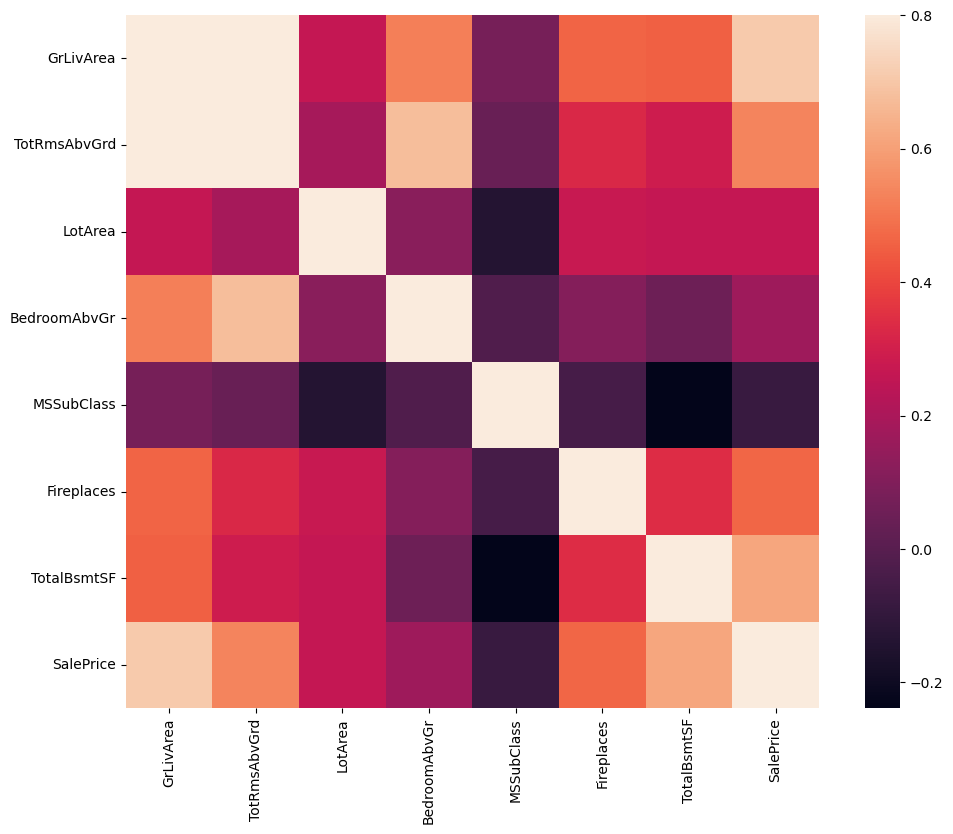

In [11]:
# Calculate the correlation matrix for selected numeric columns
# and create a heatmap to visualize the correlations
numcols=['GrLivArea',"TotRmsAbvGrd",'LotArea','BedroomAbvGr','MSSubClass','Fireplaces','TotalBsmtSF','SalePrice']
corrmat=data[numcols].corr()
# Create a heatmap plot
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cbar=True);

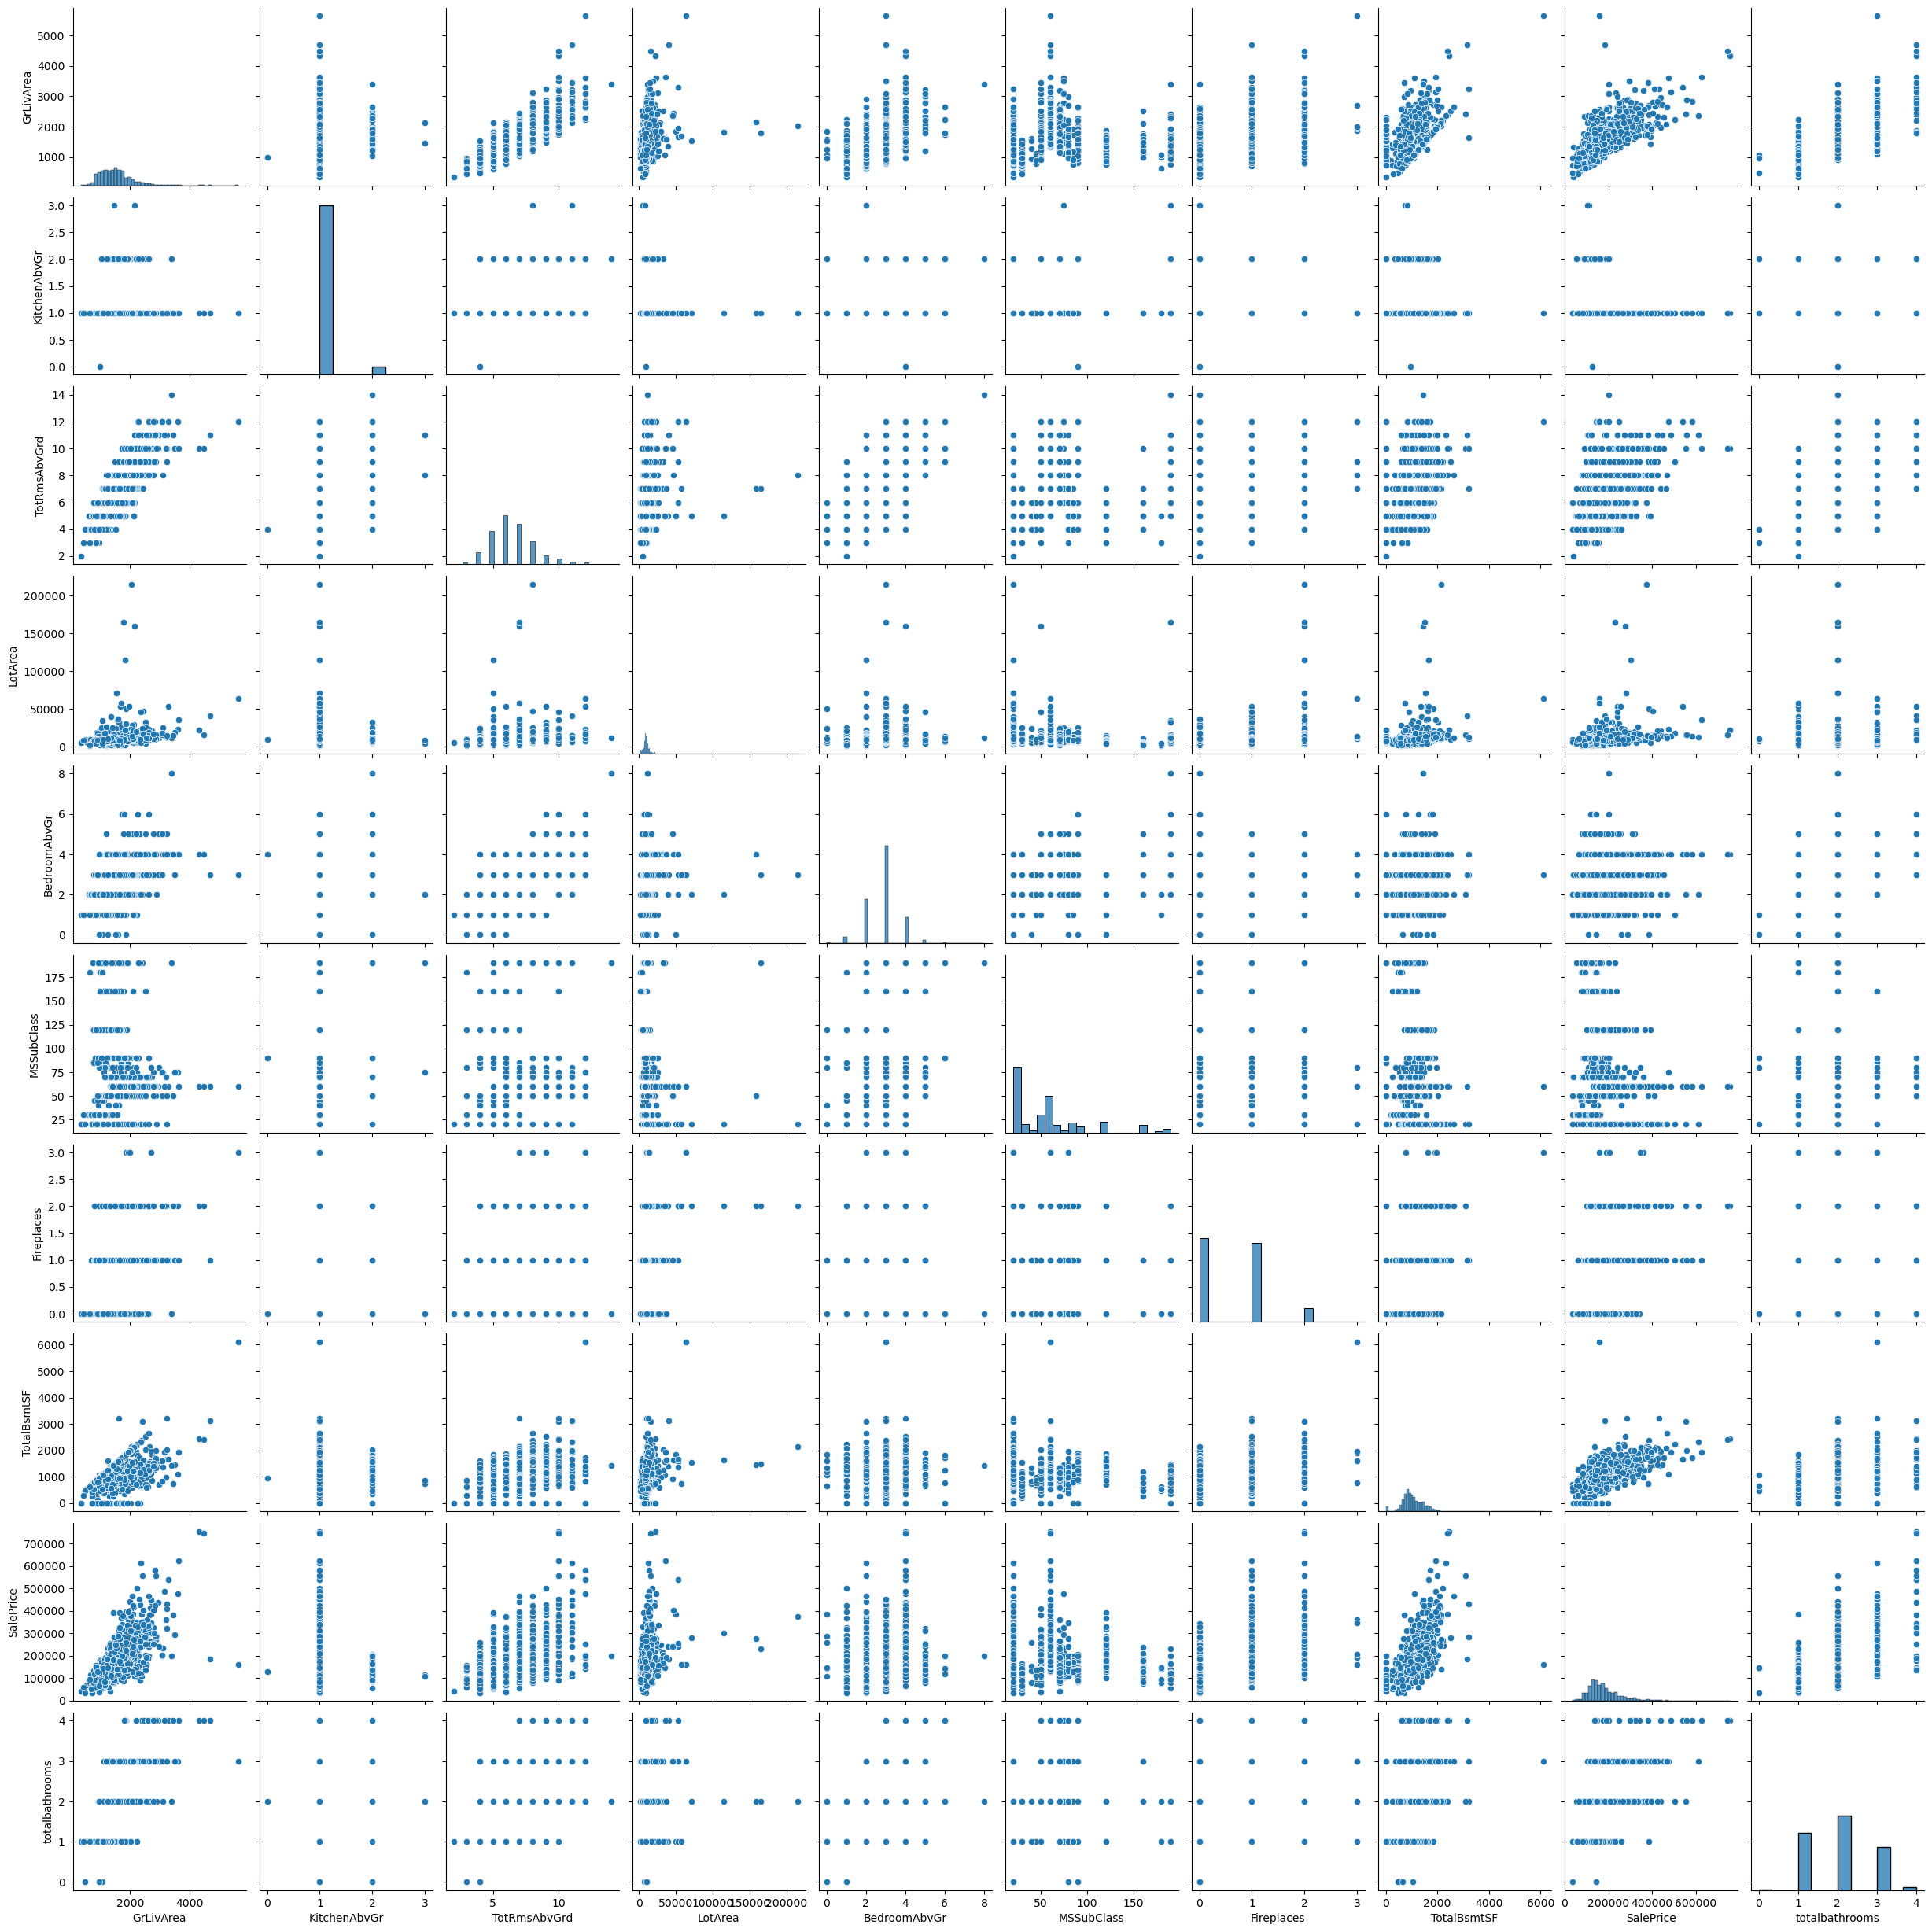

In [12]:
# Create a pair plot to visualize relationships between numeric variables
sns.pairplot(data)

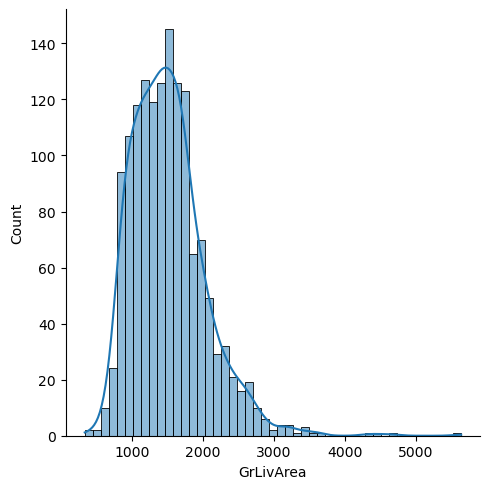

In [13]:
# Create a distribution plot for the 'GrLivArea' column with KDE
sns.displot(data['GrLivArea'],kde=True)

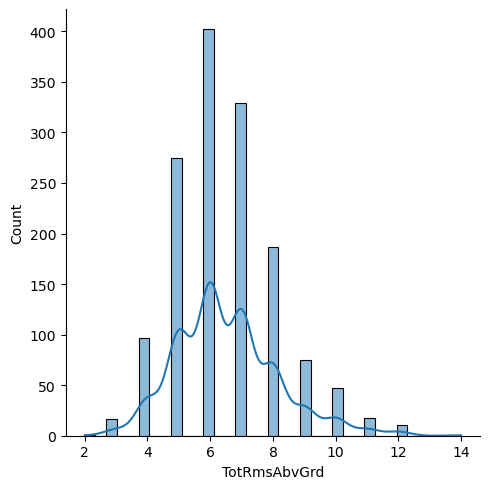

In [14]:
# Create a distribution plot for the 'TotRmsAbvGrd' column with KDE
sns.displot(data["TotRmsAbvGrd"],kde=True)

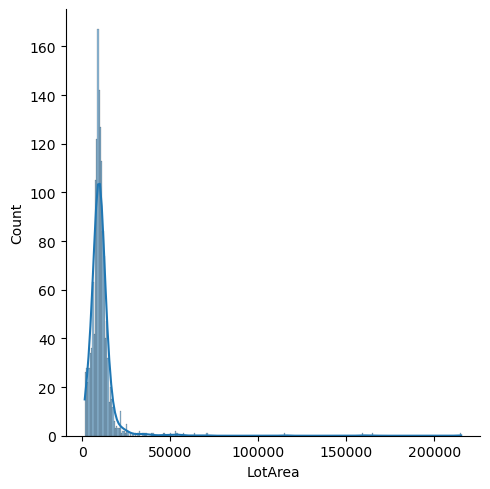

In [15]:
# Create a distribution plot for the 'LotArea' column with KDE
sns.displot(data['LotArea'],kde=True)

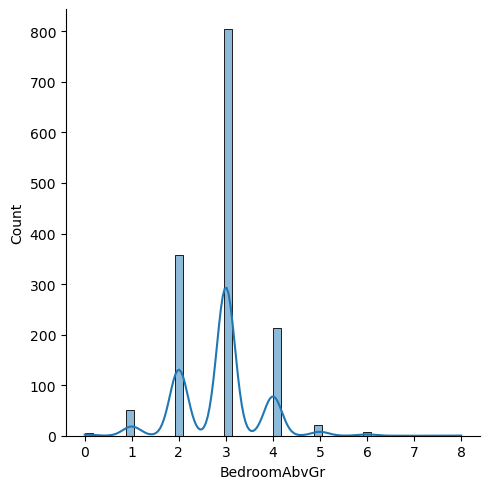

In [16]:
# Create a distribution plot for the 'BedroomAbvGr' column with KDE
sns.displot(data['BedroomAbvGr'],kde=True)

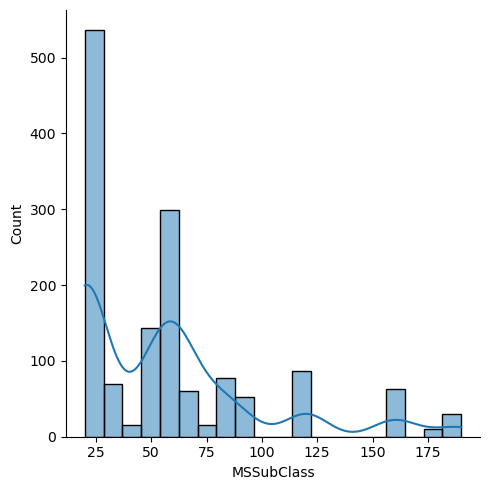

In [17]:
# Create a distribution plot for the 'MSSubClass' column with KDE
sns.displot(data['MSSubClass'],kde=True)

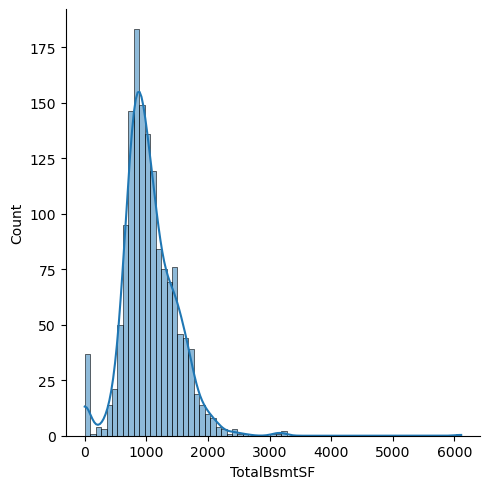

In [18]:
# Create a distribution plot for the 'TotalBsmtSF' column with KDE
sns.displot(data['TotalBsmtSF'],kde=True)

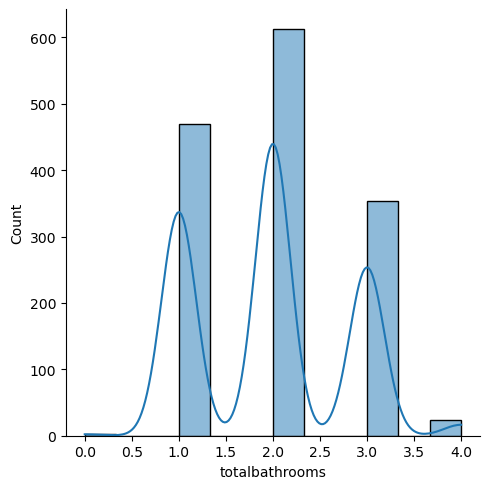

In [19]:
# Create a distribution plot for the 'totalbathrooms' column with KDE
sns.displot(data['totalbathrooms'],kde=True)

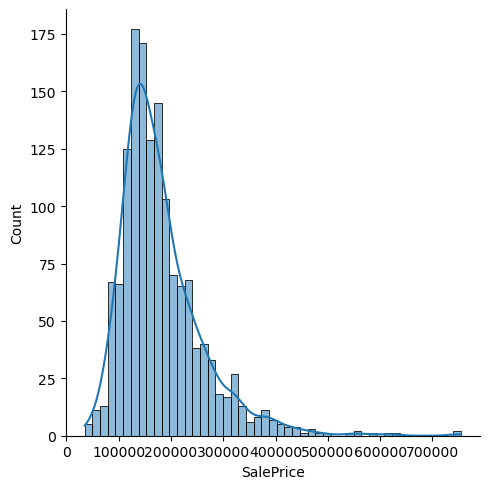

In [20]:
# Create a distribution plot for the 'SalePrice' column with KDE
sns.displot(data['SalePrice'],kde=True)

<Axes: xlabel='GrLivArea'>

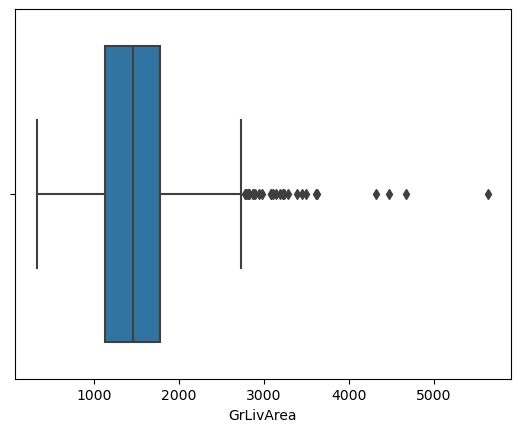

In [21]:
# Create a box plot to visualize the distribution and outliers of 'GrLivArea'
sns.boxplot(data,x='GrLivArea')

<Axes: xlabel='TotRmsAbvGrd'>

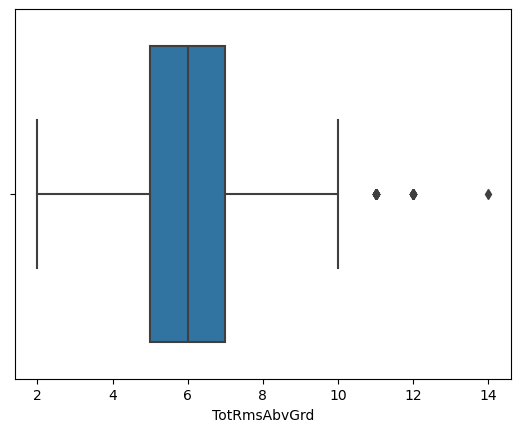

In [22]:
# Create a box plot to visualize the distribution and outliers of 'TotRmsAbvGrd'
sns.boxplot(data,x="TotRmsAbvGrd")

<Axes: xlabel='LotArea'>

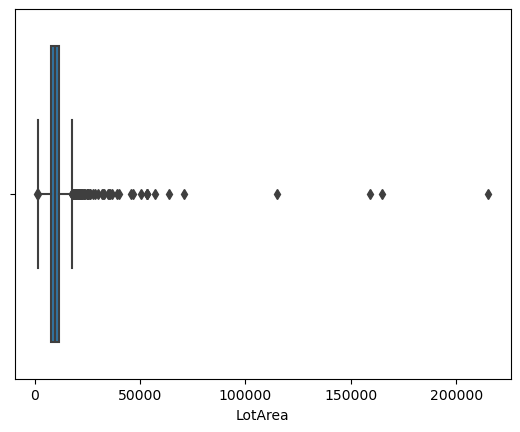

In [23]:
# Create a box plot to visualize the distribution and outliers of 'LotArea'
sns.boxplot(data,x='LotArea')

<Axes: xlabel='BedroomAbvGr'>

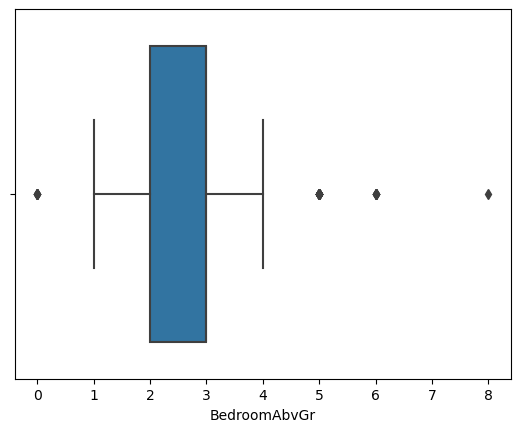

In [24]:
# Create a box plot to visualize the distribution and outliers of 'BedroomAbvGr'
sns.boxplot(data,x='BedroomAbvGr')

<Axes: xlabel='MSSubClass'>

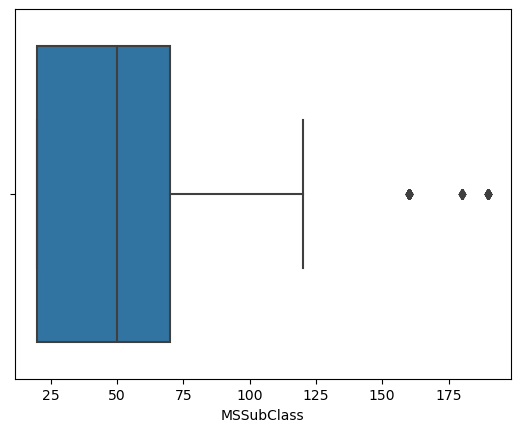

In [25]:
# Create a box plot to visualize the distribution and outliers of 'MSSubClass'
sns.boxplot(data,x='MSSubClass')

<Axes: xlabel='TotalBsmtSF'>

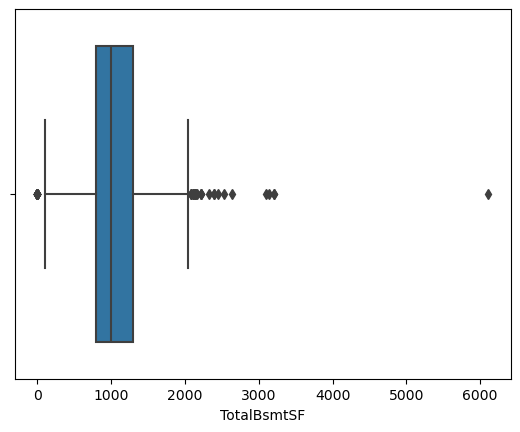

In [26]:
# Create a box plot to visualize the distribution and outliers of 'TotalBsmtSF'
sns.boxplot(data,x='TotalBsmtSF')

<Axes: xlabel='totalbathrooms'>

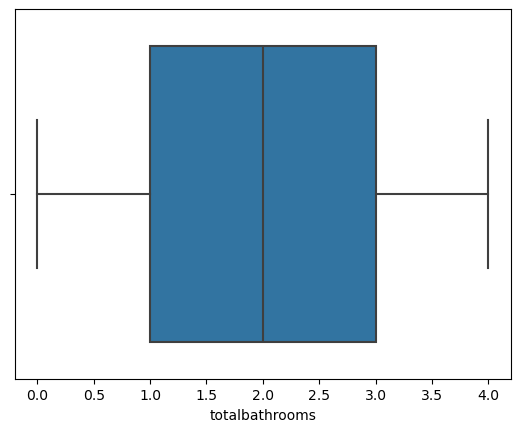

In [27]:
# Create a box plot to visualize the distribution and outliers of 'totalbathrooms'
sns.boxplot(data,x='totalbathrooms')

<Axes: xlabel='SalePrice'>

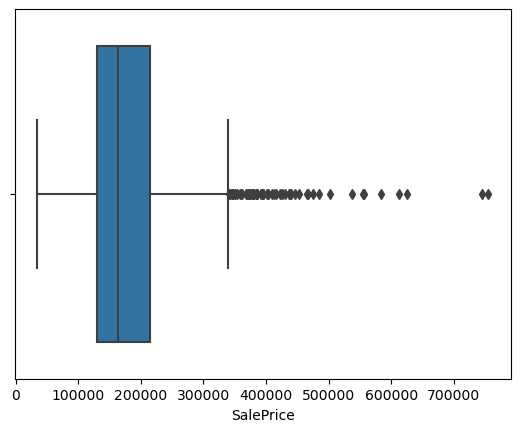

In [28]:
# Create a box plot to visualize the distribution and outliers of 'SalePrice'
sns.boxplot(data,x='SalePrice')

# Fixing Distributions using log transform

<Figure size 800x600 with 0 Axes>

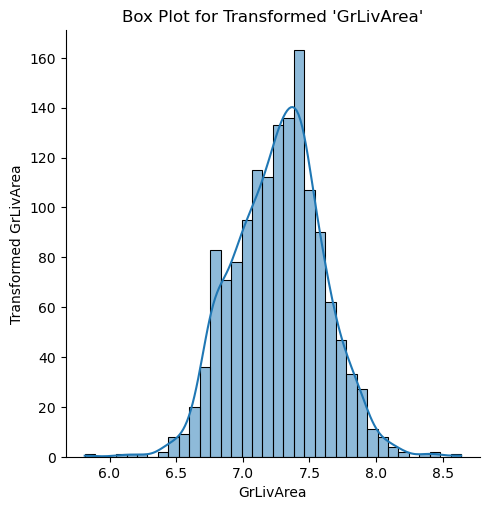

In [29]:
# Apply a log transformation to the "GrLivArea" column
data.loc[:,'GrLivArea'] = np.log1p(data['GrLivArea'])

# Create a box plot to visualize the transformed "GrLivArea" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['GrLivArea'],kde=True)
plt.title("Box Plot for Transformed 'GrLivArea'")
plt.ylabel("Transformed GrLivArea")
plt.show()

<Figure size 800x600 with 0 Axes>

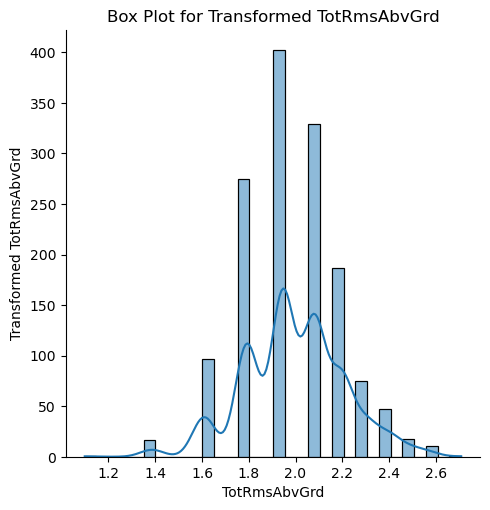

In [30]:
# Apply a log transformation to the "TotRmsAbvGrd" column
data.loc[:,"TotRmsAbvGrd"] = np.log1p(data["TotRmsAbvGrd"])

# Create a box plot to visualize the transformed "TotRmsAbvGrd" column
plt.figure(figsize=(8, 6))
sns.displot(x=data["TotRmsAbvGrd"],kde=True)
plt.title("Box Plot for Transformed TotRmsAbvGrd")
plt.ylabel("Transformed TotRmsAbvGrd")
plt.show()

<Figure size 800x600 with 0 Axes>

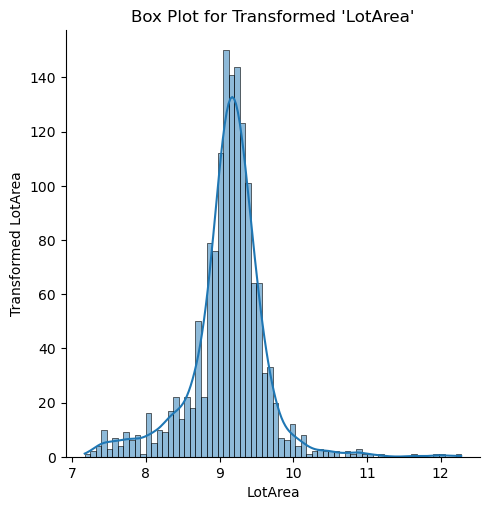

In [31]:
# Apply a log transformation to the "LotArea" column
data.loc[:,'LotArea'] = np.log1p(data['LotArea'])

# Create a box plot to visualize the transformed "LotArea" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['LotArea'],kde=True)
plt.title("Box Plot for Transformed 'LotArea'")
plt.ylabel("Transformed LotArea")
plt.show()

<Figure size 800x600 with 0 Axes>

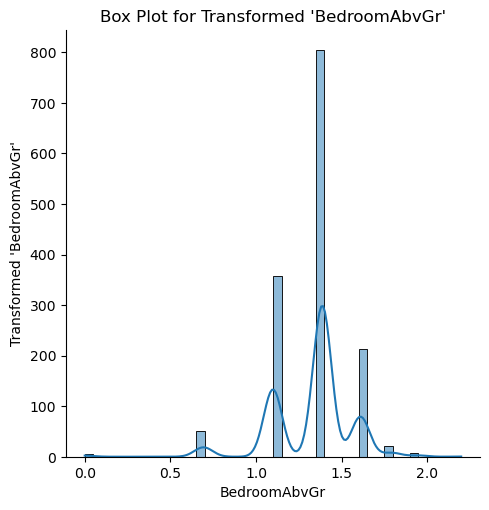

In [32]:
# Apply a log transformation to the "BedroomAbvGr" column
data.loc[:,'BedroomAbvGr'] = np.log1p(data['BedroomAbvGr'])

# Create a box plot to visualize the transformed "BedroomAbvGr" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['BedroomAbvGr'],kde=True)
plt.title("Box Plot for Transformed 'BedroomAbvGr'")
plt.ylabel("Transformed 'BedroomAbvGr'")
plt.show()

<Figure size 800x600 with 0 Axes>

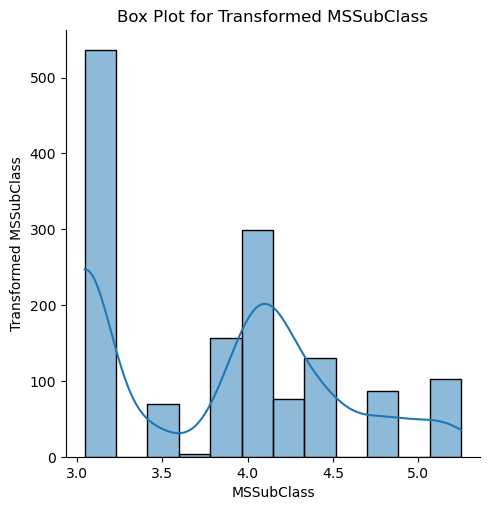

In [33]:
# Apply a log transformation to the "MSSubClass" column
data.loc[:,'MSSubClass'] = np.log1p(data['MSSubClass'])

# Create a box plot to visualize the transformed "MSSubClass" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['MSSubClass'],kde=True)
plt.title("Box Plot for Transformed MSSubClass")
plt.ylabel("Transformed MSSubClass")
plt.show()

<Figure size 800x600 with 0 Axes>

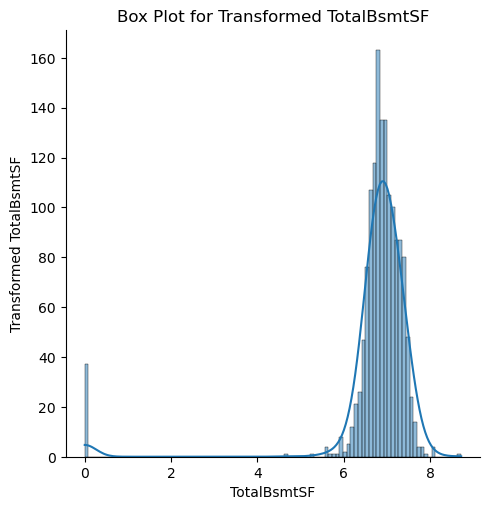

In [34]:
# Apply a log transformation to the "TotalBsmtSF" column
data.loc[:,'TotalBsmtSF'] = np.log1p(data['TotalBsmtSF'])

# Create a box plot to visualize the transformed "TotalBsmtSF" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['TotalBsmtSF'],kde=True)
plt.title("Box Plot for Transformed TotalBsmtSF")
plt.ylabel("Transformed TotalBsmtSF")
plt.show()

<Figure size 800x600 with 0 Axes>

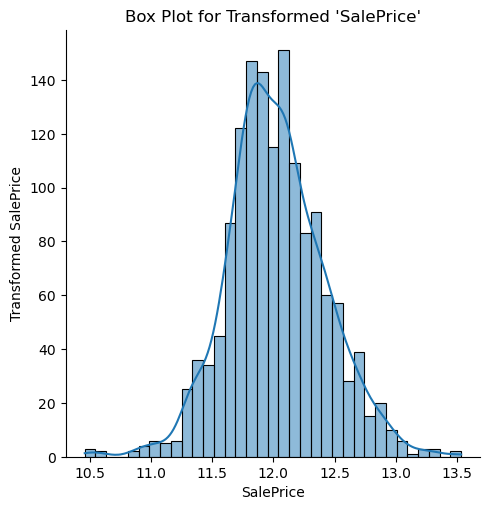

In [35]:
# Apply a log transformation to the "SalePrice" column
data.loc[:,'SalePrice'] = np.log1p(data['SalePrice'])

# Create a box plot to visualize the transformed "SalePrice" column
plt.figure(figsize=(8, 6))
sns.displot(x=data['SalePrice'],kde=True)
plt.title("Box Plot for Transformed 'SalePrice'")
plt.ylabel("Transformed SalePrice")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# Removing Outliers

In [36]:
def remove_outliers(df):
    # Calculate the lower and upper quantiles
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    # Calculate the interquartile range
    iqr = q3 - q1

    # Calculate the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Create a new column with the outlier status
    df['outlier'] = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

    # Remove the outliers
    df = df[~df['outlier']]

    # Drop the outlier column
    df = df.drop('outlier', axis=1)

    return df

In [37]:
# Remove outliers from the dataset
data=remove_outliers(data)

## Redrawing box plots

<Axes: xlabel='GrLivArea'>

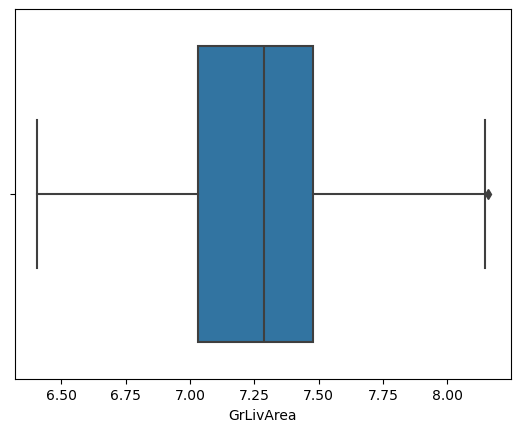

In [38]:
sns.boxplot(data,x='GrLivArea')

<Axes: xlabel='TotRmsAbvGrd'>

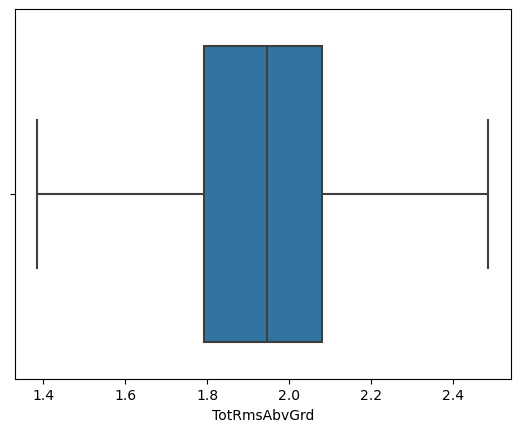

In [39]:
sns.boxplot(data,x='TotRmsAbvGrd')

<Axes: xlabel='LotArea'>

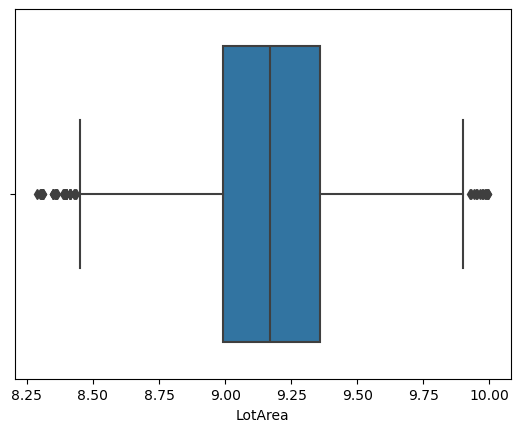

In [40]:
sns.boxplot(data,x='LotArea')

<Axes: xlabel='BedroomAbvGr'>

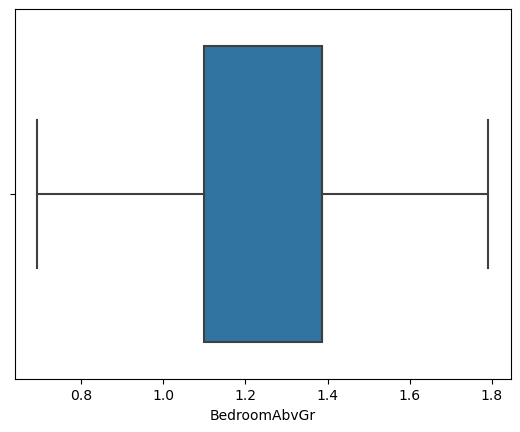

In [41]:
sns.boxplot(data,x='BedroomAbvGr')

<Axes: xlabel='MSSubClass'>

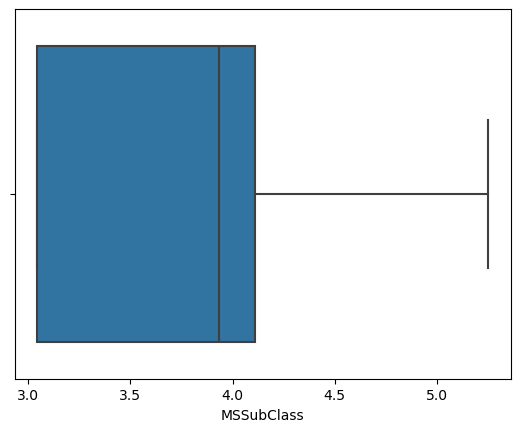

In [42]:
sns.boxplot(data,x='MSSubClass')

<Axes: xlabel='TotalBsmtSF'>

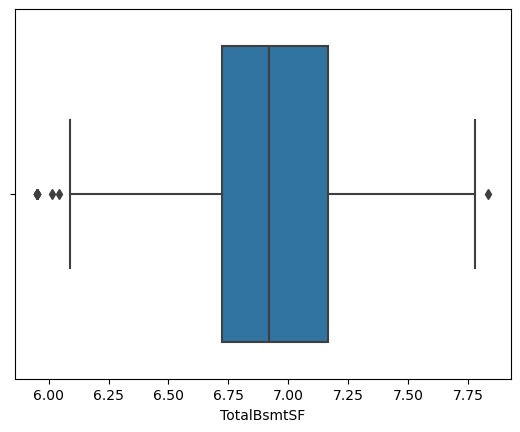

In [43]:
sns.boxplot(data,x='TotalBsmtSF')

<Axes: xlabel='GrLivArea'>

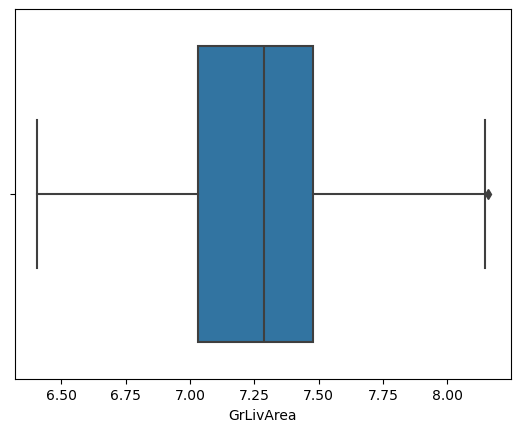

In [44]:
sns.boxplot(data,x="GrLivArea")

<Axes: xlabel='SalePrice'>

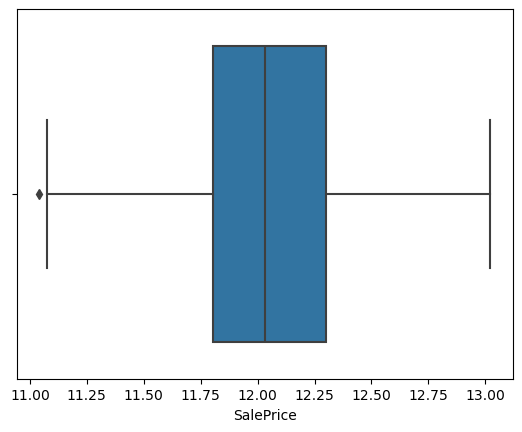

In [45]:
sns.boxplot(data,x="SalePrice")

-------------------

-------------------------------------------------------------------------------------------------------------------------------

# Splitting Dataset and training the model

In [46]:
# Create a new DataFrame 'data_x' by dropping the 'SalePrice' column
data_x=data.drop("SalePrice",axis=1)

In [47]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GrLivArea       1201 non-null   float64
 1   KitchenAbvGr    1201 non-null   int64  
 2   TotRmsAbvGrd    1201 non-null   float64
 3   LotArea         1201 non-null   float64
 4   BedroomAbvGr    1201 non-null   float64
 5   MSSubClass      1201 non-null   float64
 6   Fireplaces      1201 non-null   int64  
 7   TotalBsmtSF     1201 non-null   float64
 8   totalbathrooms  1201 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 93.8 KB


In [48]:
# Create a new DataFrame 'data_y' containing only the 'SalePrice' column
data_y=data["SalePrice"]

In [49]:
from sklearn.preprocessing import StandardScaler
# Standardize the features using StandardScaler
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)

In [50]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
# Create a LinearRegression model and fit it to the training data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [52]:
# Predict the target variable 'SalePrice' for the training set
y_pred_train=reg.predict(x_train)
# Predict the target variable 'SalePrice' for the test set
y_pred_test=reg.predict(x_test)

## Model Evaluation

In [53]:
from sklearn.metrics import mean_squared_error
# Calculate the mean squared error (MSE) for the training set predictions
mse_train=mean_squared_error(y_train,y_pred_train)
# Calculate the mean squared error (MSE) for the test set predictions
mse_test=mean_squared_error(y_test,y_pred_test)
print(f"mse of the Trianing set is {mse_train}")
print(f"mse of the Test set is {mse_test}")

mse of the Trianing set is 0.031032453773418612
mse of the Test set is 0.027361879468890023


In [54]:
from sklearn.metrics import r2_score
# Calculate the R2 score (coefficient of determination) for the training set predictions
r2_train = r2_score(y_train, y_pred_train)
# Calculate the R2 score for the test set predictions
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 score of the Trianing set is {r2_train}")
print(f"R2 score of the Test set is {r2_test}")

R2 score of the Trianing set is 0.7493867835127754
R2 score of the Test set is 0.8151174169932737
